# Recommended location for opening a fashion store in Paris

The data was downloaded and placed on the GitHub https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv

So let's download the dataset and read it into a pandas dataframe.

In [1]:
import numpy as np
import json
import pandas as pd

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from bs4 import BeautifulSoup

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
paris = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Arrondissements_.csv')
paris

,CAR,NAME,NSQAR,CAR.1,CARINSEE,LAR,NSQCO,SURFACE,PERIMETRE,Geometry_X,Geometry_Y
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


The data was imported into the notebook from the source, but it is not in the right structure for our purposes. So some data exploring, wrangling and cleaning is needed.

Let's rename the columns first.

In [3]:
paris.rename(columns={'NAME': 'Neighborhood ', 'CAR': 'Arrondissement_Num', 'Geometry_X': 'Latitude', 'Geometry_Y': 'Longitude',  'LAR': 'French_Name'}, inplace=True)
paris

,Arrondissement_Num,Neighborhood,NSQAR,CAR.1,CARINSEE,French_Name,NSQCO,SURFACE,PERIMETRE,Latitude,Longitude
0,3,Temple,750000003,3,3,3eme Ardt,750001537,1170882828,4519264,48.862872,2.360001
1,19,Buttes-Chaumont,750000019,19,19,19eme Ardt,750001537,6792651129,11253182,48.887076,2.384821
2,14,Observatoire,750000014,14,14,14eme Ardt,750001537,5614877309,10317483,48.829245,2.326542
3,10,Entrepot,750000010,10,10,10eme Ardt,750001537,2891739442,6739375,48.876130,2.360728
4,12,Reuilly,750000012,12,12,12eme Ardt,750001537,16314782637,24089666,48.834974,2.421325
5,16,Passy,750000016,16,16,16eme Ardt,750001537,16372542129,17416110,48.860392,2.261971
6,11,Popincourt,750000011,11,11,11eme Ardt,750001537,3665441552,8282012,48.859059,2.380058
7,2,Bourse,750000002,2,2,2eme Ardt,750001537,991153745,4554104,48.868279,2.342803
8,4,Hotel-de-Ville,750000004,4,4,4eme Ardt,750001537,1600585632,5420908,48.854341,2.357630
9,17,Batignolles-Monceau,750000017,17,17,17eme Ardt,750001537,5668834504,10775580,48.887327,2.306777


Now let's clean up the dataset to remove unnecessary columns.

In [4]:
paris.drop(['NSQAR','CAR.1','CARINSEE','NSQCO','SURFACE', 'PERIMETRE' ], axis=1, inplace=True)
paris

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,19,Buttes-Chaumont,19eme Ardt,48.887076,2.384821
2,14,Observatoire,14eme Ardt,48.829245,2.326542
3,10,Entrepot,10eme Ardt,48.876130,2.360728
4,12,Reuilly,12eme Ardt,48.834974,2.421325
5,16,Passy,16eme Ardt,48.860392,2.261971
6,11,Popincourt,11eme Ardt,48.859059,2.380058
7,2,Bourse,2eme Ardt,48.868279,2.342803
8,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
9,17,Batignolles-Monceau,17eme Ardt,48.887327,2.306777


In [5]:
paris.shape

(20, 5)

Let's use the geopy library to get the latitude and longitude values of Paris.

In [6]:
from geopy.geocoders import Nominatim 

address = 'Paris'

geolocator = Nominatim(user_agent="Paris_explorer")

location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

print('The geographical coordinates of Paris France are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Paris France are 48.8566969, 2.3514616.


Let's create a map of Paris with districts superimposed.

In [7]:
map_paris = folium.Map(location=[latitude, longitude], zoom_start=12)


for lat, lng, label in zip(paris['Latitude'], paris['Longitude'], paris['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=25,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.3,
        parse_html=False).add_to(map_paris)  
    
map_paris

Let's use the Foursquare API to explore the neighborhoods of Paris (Arrondissements).

In [8]:
CLIENT_ID = 'RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R'
CLIENT_SECRET = 'GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R
CLIENT_SECRET:GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL


Let's explore the first district in our dataframe to become familiar with the data (using the French descriptive arrondissement name).

In [9]:
paris.loc[0, 'French_Name']
paris.loc[0, 'French_Name']

'3eme Ardt'

In [10]:
neighborhood_latitude = paris.loc[0, 'Latitude']
neighborhood_longitude = paris.loc[0, 'Longitude']

neighborhood_name = paris.loc[0, 'French_Name']

print('Latitude and longitude values of the neighborhood {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of the neighborhood 3eme Ardt are 48.86287238, 2.3600009859999997.


Let's get the top 100 venues that are in the neighborhood 3eme Ardt within a radius of 500 meters.

In [11]:
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RU3Y3XCL1D3X4IFWHEPI3VYYAEEGSWMVQTWP2PHZ1DEL1E2R&client_secret=GMMPCVSMWDJDXSOTEO22G3FN4H2BUFSZO05SYEGRGW4N5AKL&v=20180605&ll=48.86287238,2.3600009859999997&radius=500&limit=100'

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e2df634c94979001b40b65b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Enfants-Rouges',
  'headerFullLocation': 'Enfants-Rouges, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 130,
  'suggestedBounds': {'ne': {'lat': 48.8673723845, 'lng': 2.3668285468065267},
   'sw': {'lat': 48.8583723755, 'lng': 2.353173425193473}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d974096a2c654814aa6d353',
       'name': 'Mmmozza',
       'location': {'address': '57 rue de Bretagne',
        'lat': 48.86391016055883,
        'lng': 2.360590696334839,
        'labeledLatLngs': [{'label': 'display',
          'lat': 48.863910160558

Let's define a function that extracts the category of the venue.

In [13]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Let's clean the json and structure it into a pandas dataframe.

In [14]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

,name,categories,lat,lng
0,Mmmozza,Sandwich Place,48.863910,2.360591
1,Marché des Enfants Rouges,Farmers Market,48.862806,2.361996
2,Square du Temple,Park,48.864475,2.360816
3,Chez Alain Miam Miam,Sandwich Place,48.862369,2.361950
4,Chez Alain Miam Miam,Sandwich Place,48.862781,2.362064
5,Fromagerie Jouannault,Cheese Shop,48.862947,2.362530
6,Hôtel Jules & Jim,Hotel,48.863496,2.357395
7,Les Enfants Rouges,Wine Bar,48.863013,2.361260
8,Okomusu,Okonomiyaki Restaurant,48.861453,2.360879
9,Bontemps,Dessert Shop,48.863956,2.360725


In [15]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


Let's create a nearby venues function for all the neighborhoods in Paris.

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
                 
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['French_Name', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Let's create a new dataframe for the venues of Paris called 'paris-venues'.

In [17]:
paris_venues = getNearbyVenues(names=paris['French_Name'],
                                   latitudes=paris['Latitude'],
                                   longitudes=paris['Longitude']
                                  )

3eme Ardt
19eme Ardt
14eme Ardt
10eme Ardt
12eme Ardt
16eme Ardt
11eme Ardt
2eme Ardt
4eme Ardt
17eme Ardt
18eme Ardt
1er Ardt
5eme Ardt
7eme Ardt
20eme Ardt
8eme Ardt
9eme Ardt
13eme Ardt
15eme Ardt
6eme Ardt


In [18]:
print(paris_venues.shape)
paris_venues.head(250)

(1366, 7)


,French_Name,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,3eme Ardt,48.862872,2.360001,Mmmozza,48.863910,2.360591,Sandwich Place
1,3eme Ardt,48.862872,2.360001,Marché des Enfants Rouges,48.862806,2.361996,Farmers Market
2,3eme Ardt,48.862872,2.360001,Square du Temple,48.864475,2.360816,Park
3,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862369,2.361950,Sandwich Place
4,3eme Ardt,48.862872,2.360001,Chez Alain Miam Miam,48.862781,2.362064,Sandwich Place
5,3eme Ardt,48.862872,2.360001,Fromagerie Jouannault,48.862947,2.362530,Cheese Shop
6,3eme Ardt,48.862872,2.360001,Hôtel Jules & Jim,48.863496,2.357395,Hotel
7,3eme Ardt,48.862872,2.360001,Les Enfants Rouges,48.863013,2.361260,Wine Bar
8,3eme Ardt,48.862872,2.360001,Okomusu,48.861453,2.360879,Okonomiyaki Restaurant
9,3eme Ardt,48.862872,2.360001,Bontemps,48.863956,2.360725,Dessert Shop


Let's check how many venues were returned for each neighborhood.

In [19]:
paris_venues.groupby('French_Name').count()

,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
French_Name,,,,,,
10eme Ardt,100,100,100,100,100,100
11eme Ardt,66,66,66,66,66,66
12eme Ardt,6,6,6,6,6,6
13eme Ardt,61,61,61,61,61,61
14eme Ardt,29,29,29,29,29,29
15eme Ardt,64,64,64,64,64,64
16eme Ardt,12,12,12,12,12,12
17eme Ardt,55,55,55,55,55,55
18eme Ardt,45,45,45,45,45,45


Let's calculate how many unique categories there are.

In [20]:
print('There are {} unique venue categories.'.format(len(paris_venues['Venue Category'].unique())))

There are 202 unique venue categories.


Let's analyze each of the Neighborhoods.

In [21]:
paris_onehot = pd.get_dummies(paris_venues[['Venue Category']], prefix="", prefix_sep="")

paris_onehot['Neighborhood'] = paris_venues['French_Name'] 

fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3eme Ardt,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
paris_onehot.shape

(1366, 203)

Let's group rows by neighborhood and take the mean of the frequency of occurrence of each category.

In [23]:
paris_grouped = paris_onehot.groupby('Neighborhood').mean().reset_index()
paris_grouped

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,...,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,10eme Ardt,0.000000,0.020000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.020000,...,0.010000,0.00,0.000000,0.000000,0.010000,0.020000,0.000000,0.00,0.000000,0.000000
1,11eme Ardt,0.015152,0.000000,0.000000,0.00,0.00,0.00000,0.015152,0.000000,0.015152,...,0.015152,0.00,0.015152,0.015152,0.045455,0.000000,0.015152,0.00,0.000000,0.000000
2,12eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.166667,0.166667
3,13eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.180328,...,0.000000,0.00,0.000000,0.213115,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
4,14eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
5,15eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.015625,0.015625,...,0.000000,0.00,0.000000,0.000000,0.000000,0.015625,0.015625,0.00,0.000000,0.000000
6,16eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.083333,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
7,17eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.018182,0.000000,0.000000,...,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000
8,18eme Ardt,0.000000,0.000000,0.000000,0.00,0.00,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.022222,0.022222,0.000000,0.000000,0.00,0.000000,0.000000
9,19eme Ardt,0.000000,0.020833,0.020833,0.00,0.00,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.00,0.000000,0.020833,0.000000,0.000000,0.000000,0.00,0.000000,0.000000


In [24]:
paris_grouped.shape

(20, 203)

Let's print each neighborhood with it's top 10 most common venues.

In [25]:
num_top_venues = 10

for hood in paris_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----10eme Ardt----
                 venue  freq
0    French Restaurant  0.11
1          Coffee Shop  0.05
2               Bistro  0.05
3                Hotel  0.05
4                 Café  0.04
5    Indian Restaurant  0.04
6  Japanese Restaurant  0.03
7                  Bar  0.03
8   Italian Restaurant  0.03
9          Pizza Place  0.03


----11eme Ardt----
                 venue  freq
0    French Restaurant  0.11
1                 Café  0.08
2           Restaurant  0.05
3             Wine Bar  0.05
4          Pastry Shop  0.05
5          Pizza Place  0.03
6              Theater  0.03
7   Italian Restaurant  0.03
8        Grocery Store  0.03
9  Japanese Restaurant  0.03


----12eme Ardt----
                      venue  freq
0               Zoo Exhibit  0.17
1                       Zoo  0.17
2               Supermarket  0.17
3       Monument / Landmark  0.17
4  Bike Rental / Bike Share  0.17
5                      Park  0.17
6               Pastry Shop  0.00
7   New American Restaurant  

Let's put that data into a pandas dataframe and display the top 10 venues for each neighborhood.

In [26]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [27]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

paris_venues_sorted = pd.DataFrame(columns=columns)
paris_venues_sorted['Neighborhood'] = paris_grouped['Neighborhood']

for ind in np.arange(paris_grouped.shape[0]):
    paris_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

paris_venues_sorted.head(20)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,10eme Ardt,French Restaurant,Bistro,Coffee Shop,Hotel,Indian Restaurant,Café,Bar,Japanese Restaurant,Italian Restaurant,Pizza Place
1,11eme Ardt,French Restaurant,Café,Restaurant,Wine Bar,Pastry Shop,Pizza Place,Japanese Restaurant,Cocktail Bar,Theater,Italian Restaurant
2,12eme Ardt,Zoo Exhibit,Park,Supermarket,Bike Rental / Bike Share,Monument / Landmark,Zoo,Cultural Center,Falafel Restaurant,French Restaurant,Fountain
3,13eme Ardt,Vietnamese Restaurant,Asian Restaurant,Thai Restaurant,French Restaurant,Chinese Restaurant,Juice Bar,Furniture / Home Store,Butcher,Sandwich Place,Creperie
4,14eme Ardt,French Restaurant,Hotel,Supermarket,Bistro,Bakery,Brasserie,Pizza Place,Fast Food Restaurant,Bike Rental / Bike Share,Tea Room
5,15eme Ardt,Italian Restaurant,Hotel,French Restaurant,Coffee Shop,Indian Restaurant,Park,Supermarket,Bistro,Thai Restaurant,Bakery
6,16eme Ardt,Plaza,Lake,Bus Station,Bus Stop,Boat or Ferry,Bike Rental / Bike Share,Park,French Restaurant,Art Museum,Pool
7,17eme Ardt,French Restaurant,Hotel,Italian Restaurant,Bakery,Bistro,Café,Restaurant,Japanese Restaurant,Plaza,Portuguese Restaurant
8,18eme Ardt,French Restaurant,Bar,Café,Restaurant,Hotel,Pizza Place,Coffee Shop,Convenience Store,Vietnamese Restaurant,Deli / Bodega
9,19eme Ardt,French Restaurant,Bar,Supermarket,Seafood Restaurant,Bistro,Hotel,Brewery,Beer Bar,Café,Spa


In [28]:
paris_venues_sorted.shape

(20, 11)

The business types criteria 'French Restaurants', 'Cafés' and 'Wine Bars'.
Let's look at their frequency of occurance for all the Paris neighborhoods, isolating the categorical venues.

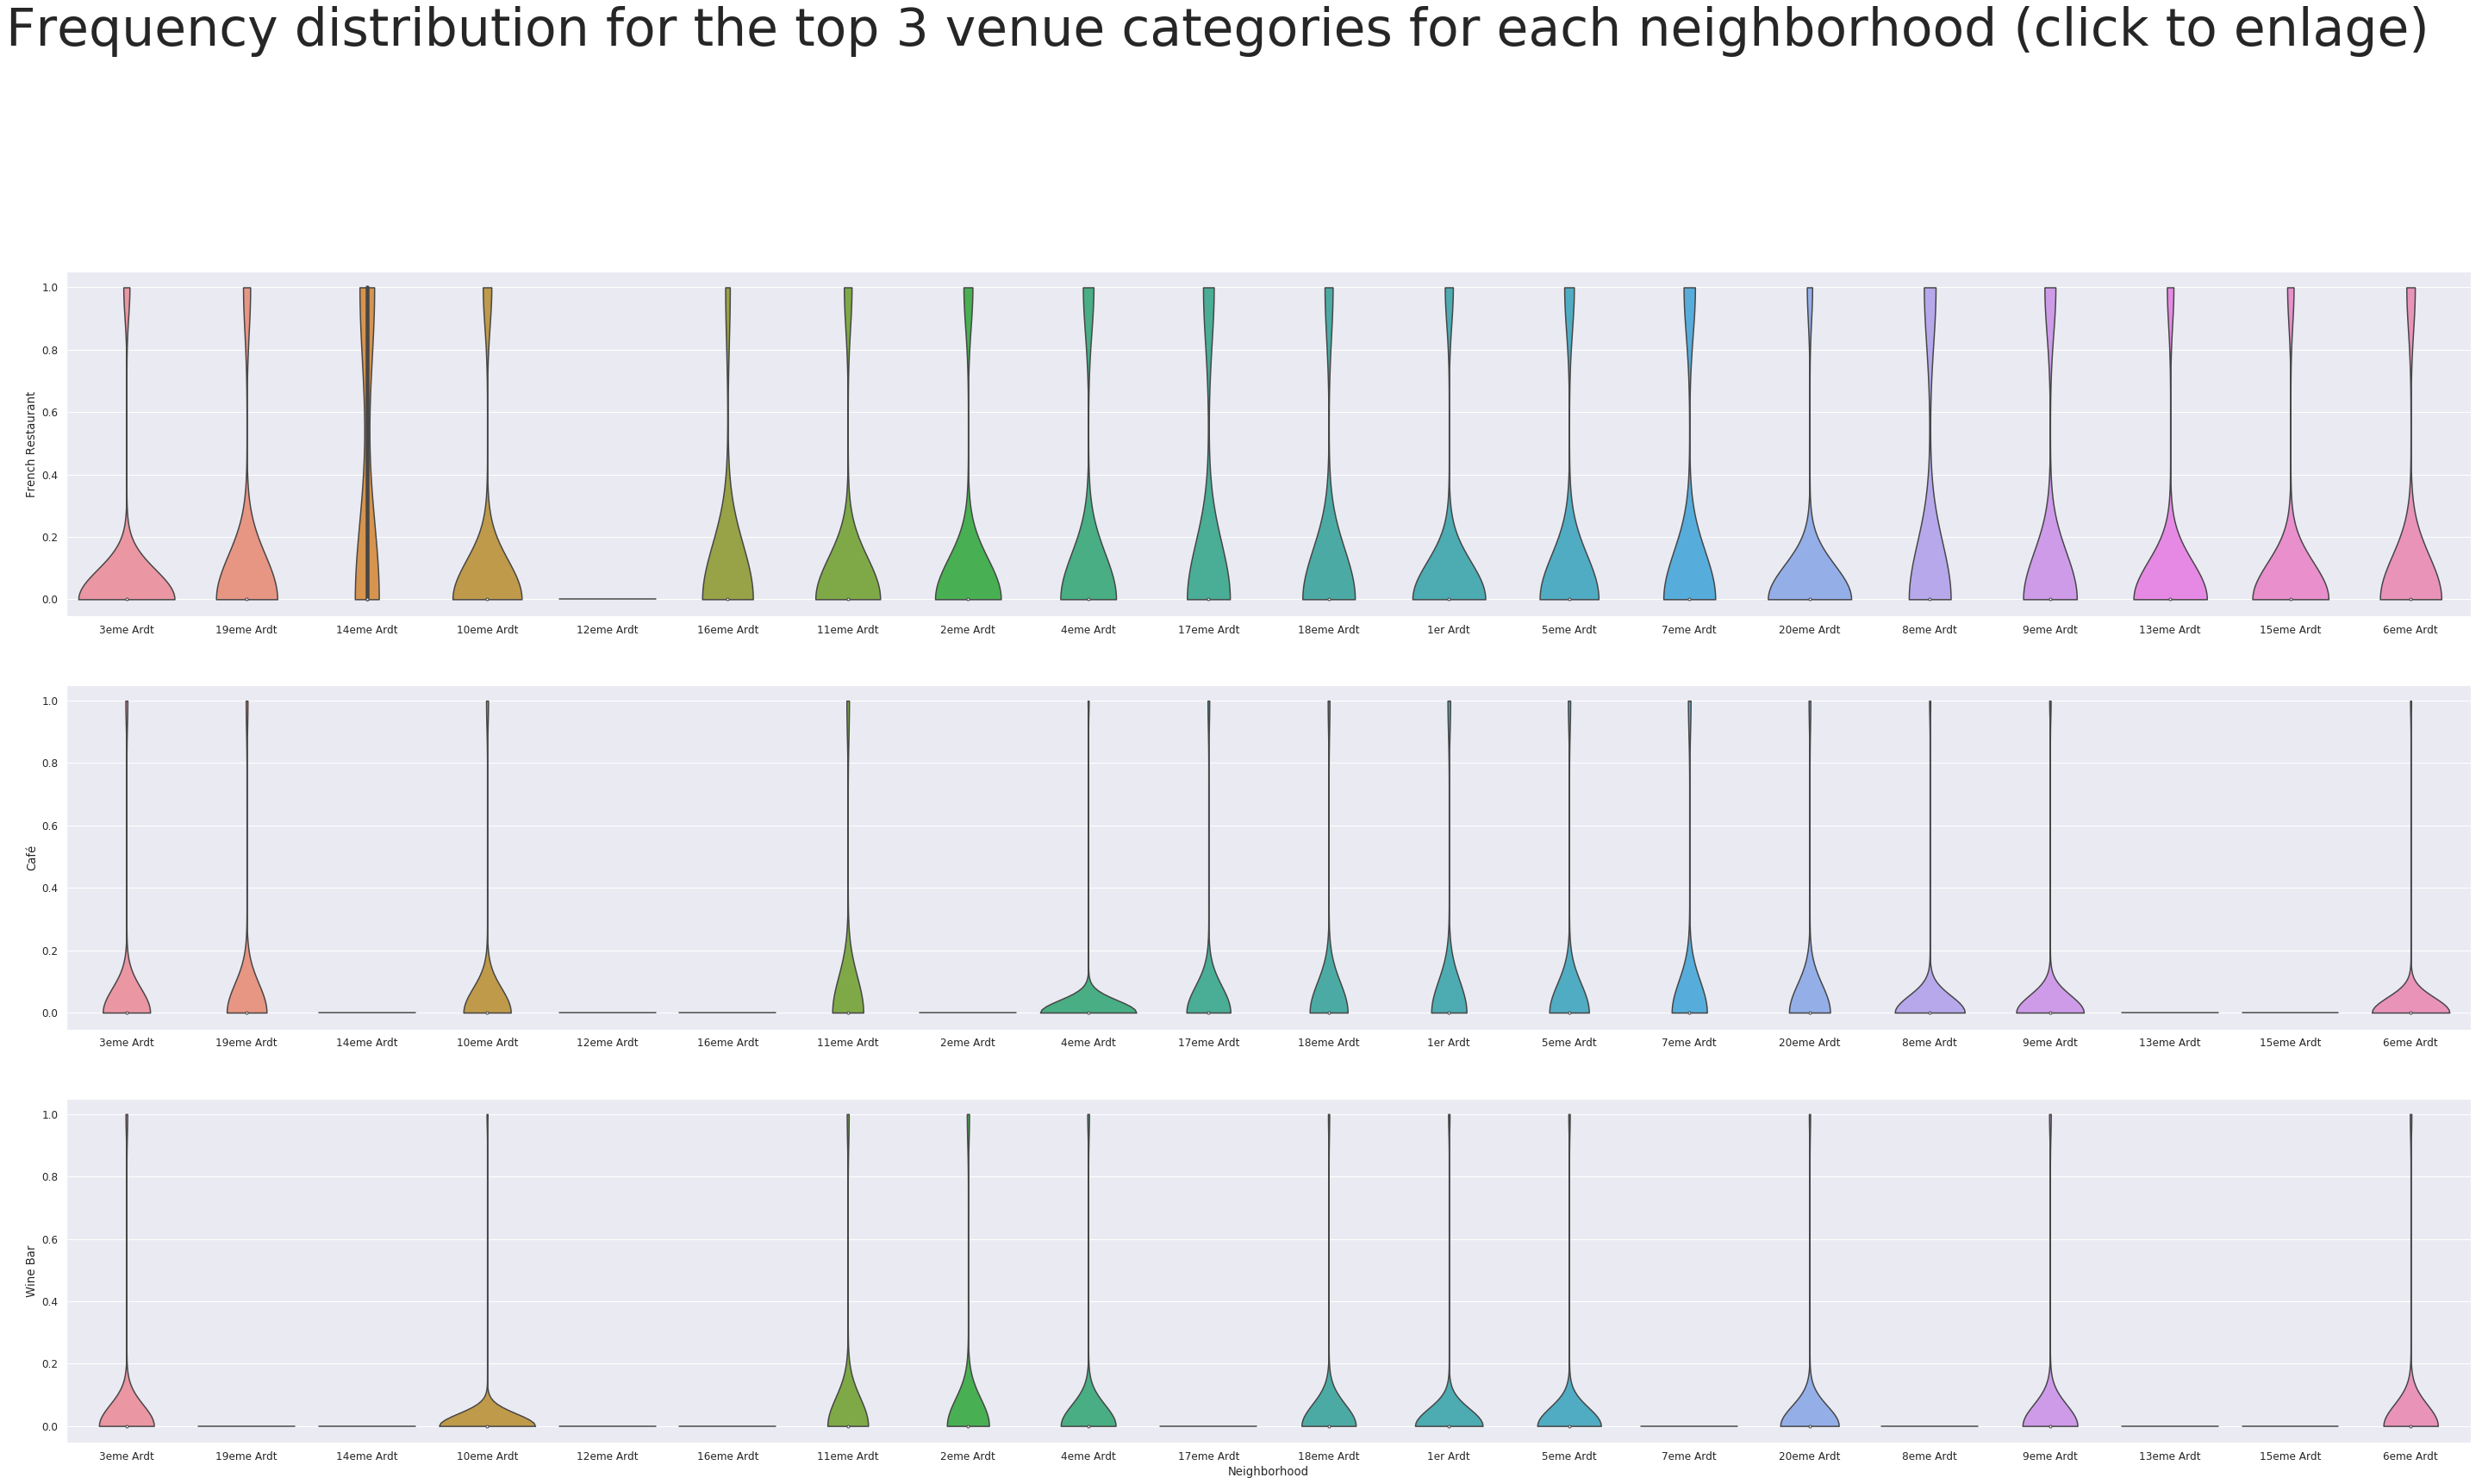

In [29]:
import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(3,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(3,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(3,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (click to enlage)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories.png", dpi=240)
plt.show()

So as we can see from the analysis there are 8 neighborhoods to open new stores - according to the criteria that they have the 3 specified venues in a great frequency (French Restaurants, Cafés and Wine Bars). They are as follows:

1. 3eme Ardt
2. 10eme Ardt
3. 11eme Ardt
4. 4eme Ardt
5. 18eme Ardt
6. 18eme Ardt
7. 5eme Ardt
8. 9eme Ardt
9. 6eme Ardt

If we included the 'Clothing_Store' venue category into the analysis, then we might be able to make some inferences based on the data, and domain knowledge of marketing and the industry, to focus the list.

So let's look at the venue category 'Clothing Store'.

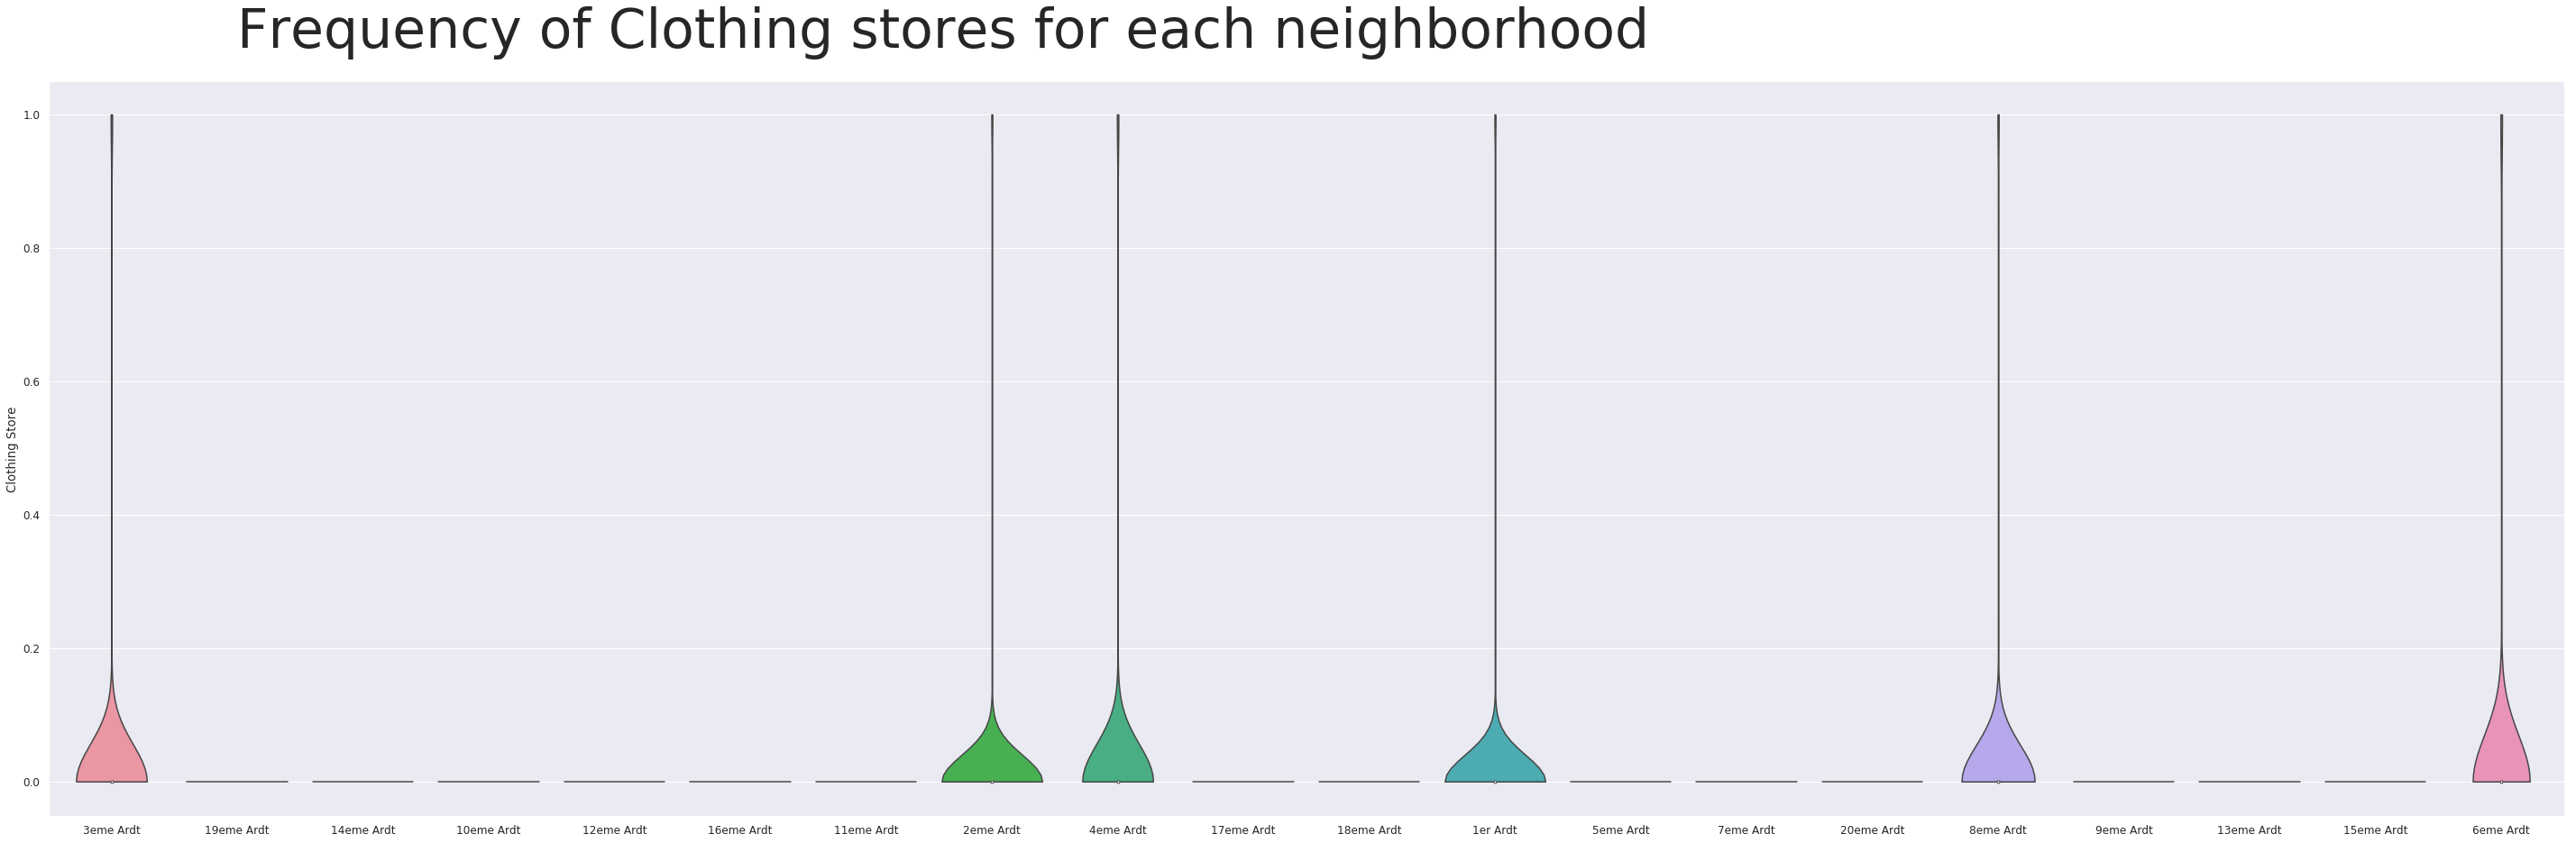

In [30]:
import seaborn as sns

fig = plt.figure(figsize=(50,15))
sns.set(font_scale=1.1)

ax = plt.subplot(1,1,1)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);
plt.xlabel("")

ax.text(1.0, 1.1, 'Frequency of Clothing stores for each neighborhood', fontsize=60)
plt.savefig ("Distribution_Frequency_Clothing_Venues.png", dpi=240)
plt.show()

So there are 5 neighborhoods that have a significant frequency density of clothing stores.

Let's add this to the analysis with the other 3 specified categories as below.

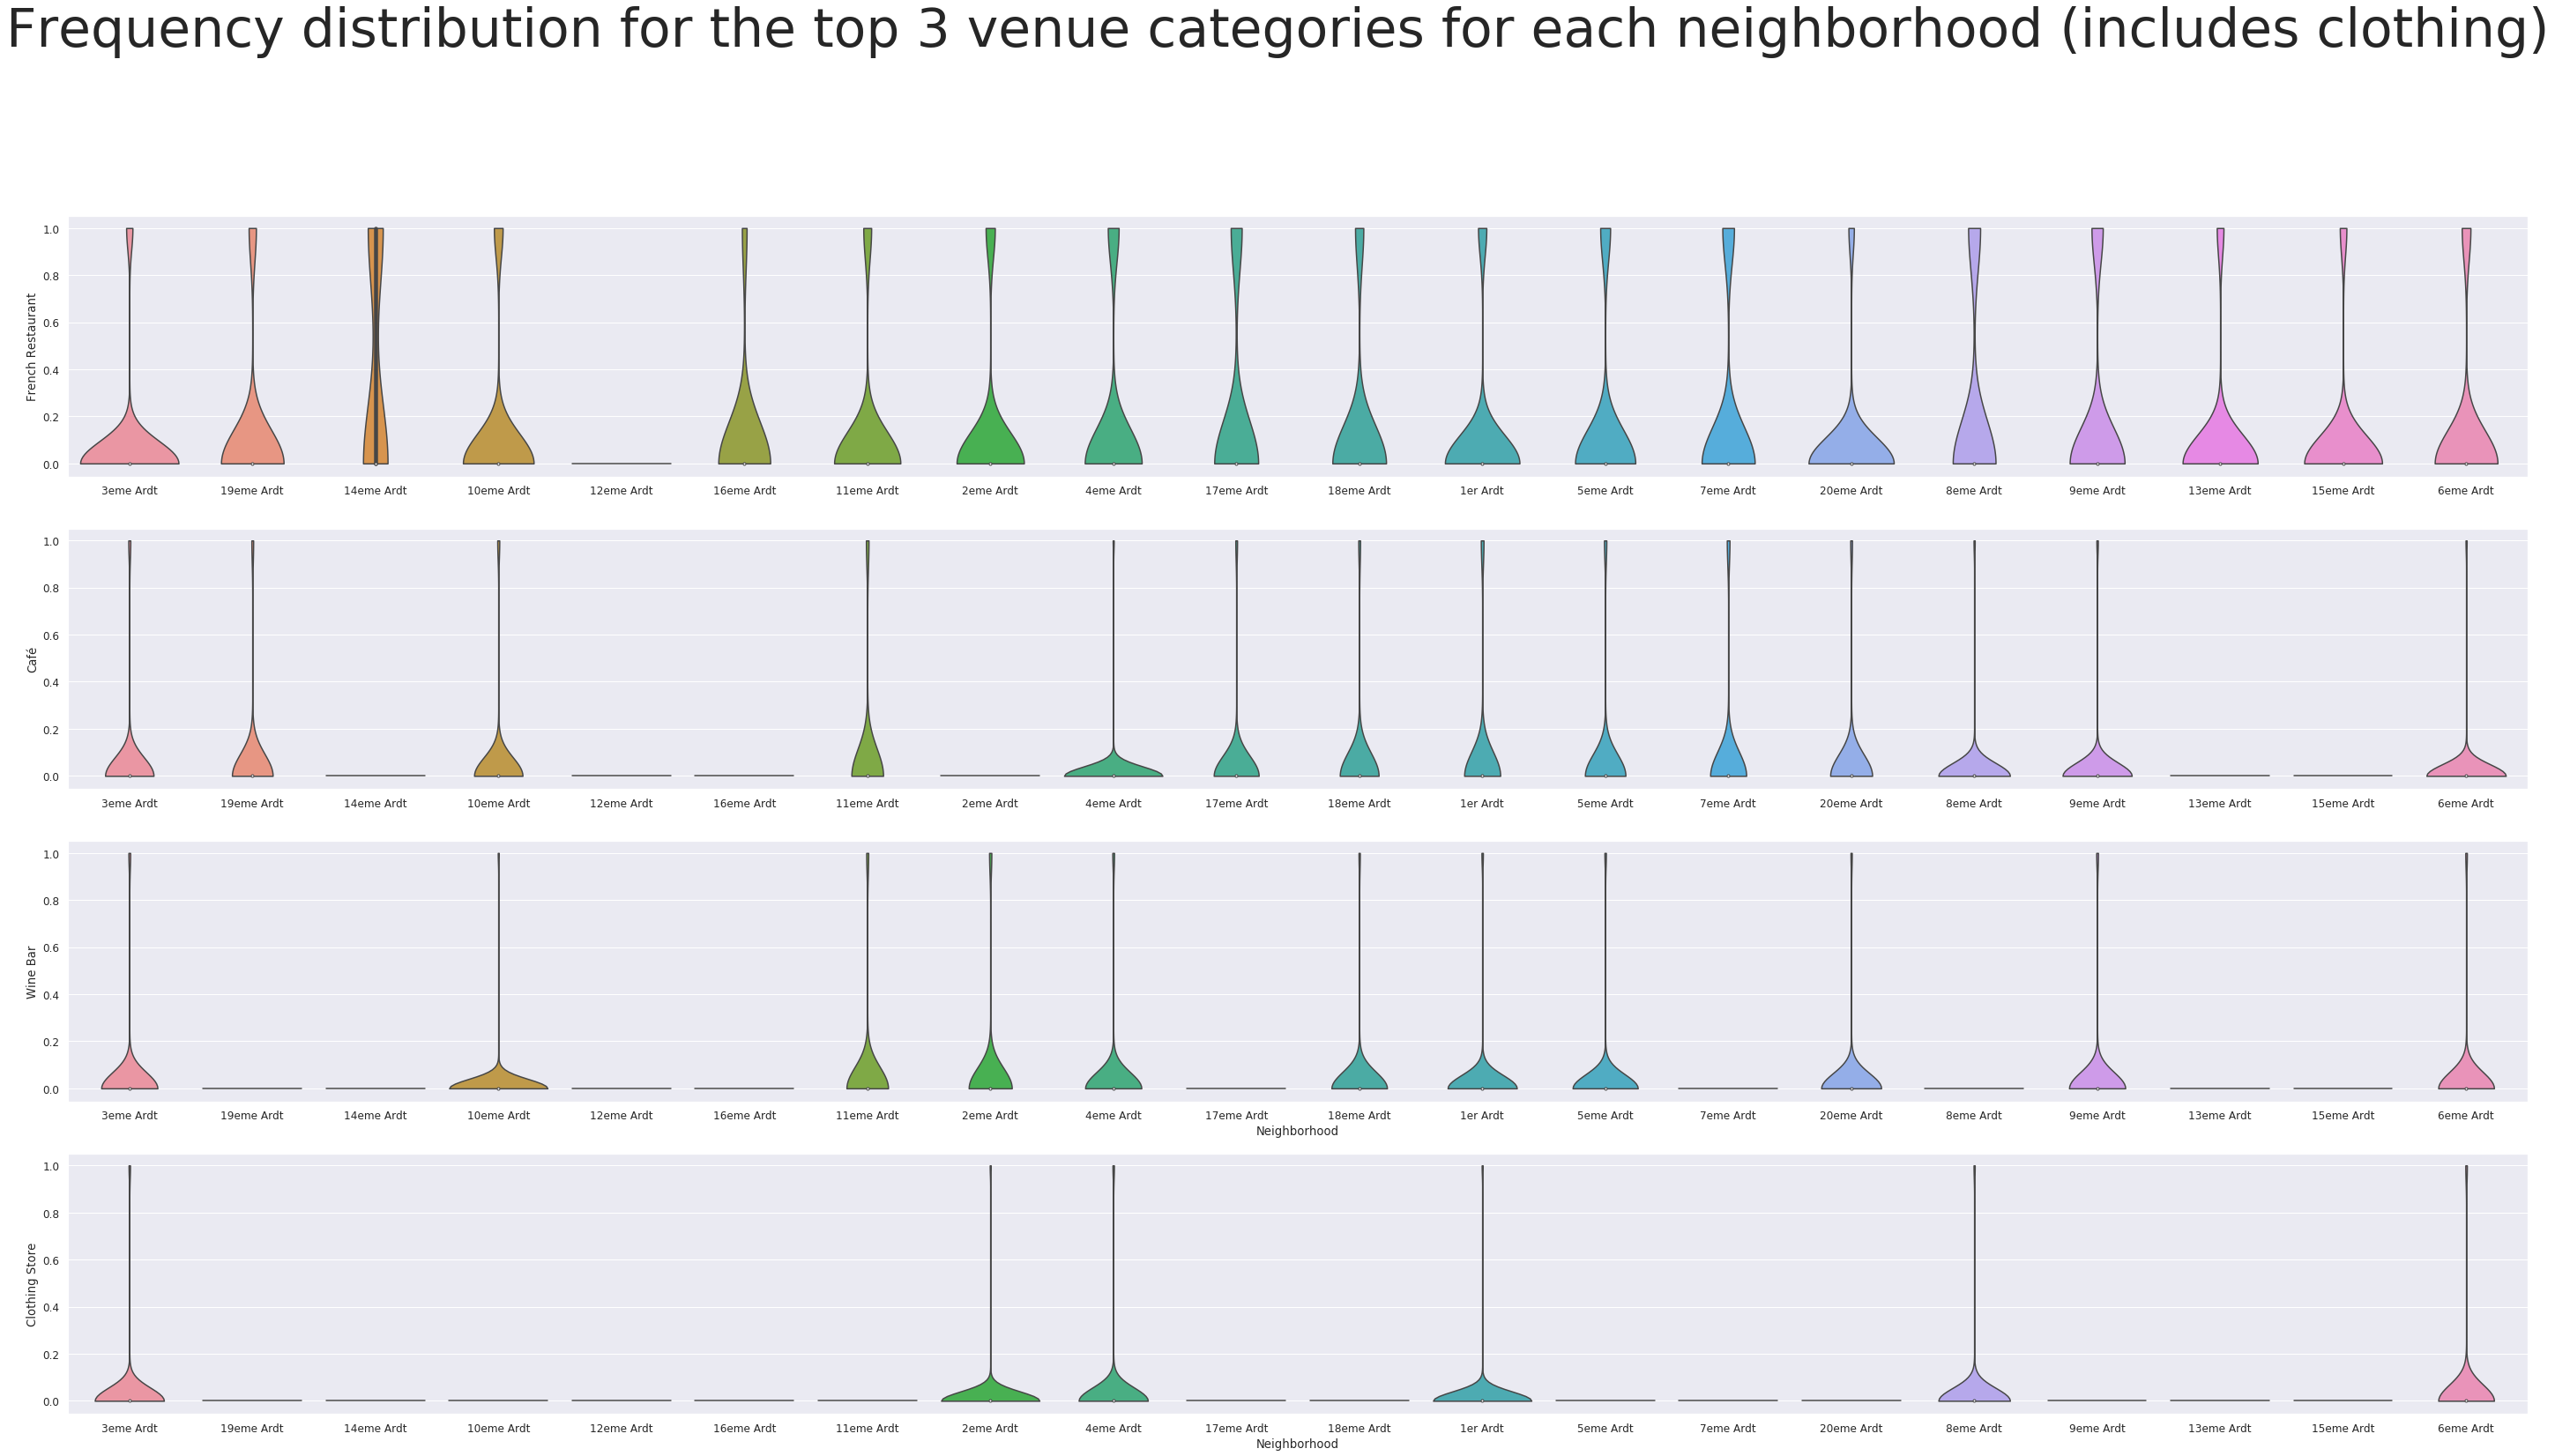

In [31]:
import seaborn as sns

fig = plt.figure(figsize=(50,25))
sns.set(font_scale=1.1)

ax = plt.subplot(4,1,1)
sns.violinplot(x="Neighborhood", y="French Restaurant", data=paris_onehot, cut=0);
plt.xlabel("")

ax = plt.subplot(4,1,2)
sns.violinplot(x="Neighborhood", y="Café", data=paris_onehot, cut=0);
plt.xlabel("")

plt.subplot(4,1,3)
sns.violinplot(x="Neighborhood", y="Wine Bar", data=paris_onehot, cut=0);

plt.subplot(4,1,4)
sns.violinplot(x="Neighborhood", y="Clothing Store", data=paris_onehot, cut=0);

ax.text(-1.0, 3.1, 'Frequency distribution for the top 3 venue categories for each neighborhood (includes clothing)', fontsize=60)
plt.savefig ("Distribution_Frequency_Venues_3_categories_clothing.png", dpi=240)
plt.show()

So the final 3 prospective neighborhoods for new store locations are where 4 criteria are met:

1. 3eme Ardt : Arrondissement 3, Temple
2. 4eme Ardt : Arrondissement 4, Hotel-de-Ville
3. 6eme Ardt : Arrondissement 6, Luxembourg

Let's look at these 3 districts on the Paris map.

In [32]:
chosen_districts = pd.read_csv('https://raw.githubusercontent.com/AR-data-science/Coursera_Capstone/master/Week%205/Chosen.csv')
chosen_districts

,Arrondissement_Num,Neighborhood,French_Name,Latitude,Longitude
0,3,Temple,3eme Ardt,48.862872,2.360001
1,4,Hotel-de-Ville,4eme Ardt,48.854341,2.357630
2,6,Luxembourg,6eme Ardt,48.849130,2.332898


In [33]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=45,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

In [34]:
map_chosen_districts = folium.Map(location=[latitude, longitude], zoom_start=15)

for lat, lng, label in zip(chosen_districts['Latitude'], chosen_districts['Longitude'], chosen_districts['French_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=130,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.2,
        parse_html=False).add_to(map_chosen_districts)  
    
map_chosen_districts

We have narrowed the search area down significantly from 20 potential districts to 3 that should suit the retail business.

The analysis and results are not an end point, but rather a starting point that will guide the next part of the process to find specific store locations. The next part will involve domain knowledge of the industry, and perhaps, of the city itself. But the data analysis and resulting recommendations have greatly narrowed down the best district options based on data and what we can infer from it.